In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import datetime


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Retail Sales Time Series Forecasting/feature_engineering/feature_engineering.csv')


In [3]:
df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Open_0,Open_1,Promo2_0,Promo2_1,SchoolHoliday_0,SchoolHoliday_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,PromoInterval_Feb_May_Aug_Nov,PromoInterval_Jan_Apr_Jul_Oct,PromoInterval_Mar_Jun_Sept_Dec,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,date_year,date_weekofyear,date_month,date_dayofweek,date_day
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-31,5263,555,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2015,31,7,4,31
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-30,5020,546,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2015,31,7,3,30
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-29,4782,523,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2015,31,7,2,29
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-28,5011,560,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2015,31,7,1,28
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,2015-07-27,6102,612,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2015,31,7,0,27


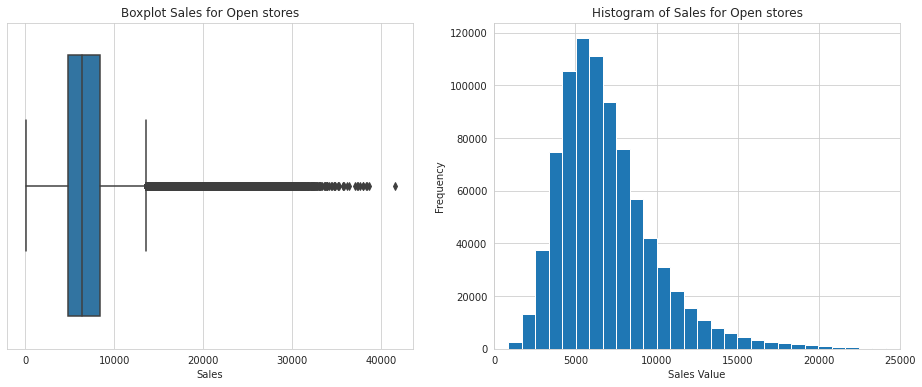

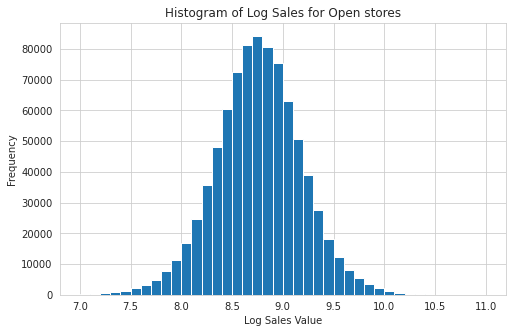

In [4]:
# Sales
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
fig, (axis3) = plt.subplots(1,1,figsize=(8,5))
mask = df['Sales']>0
sns.boxplot(df[mask]["Sales"], orient='v', ax = axis1)
axis1.set_title("Boxplot Sales for Open stores")


df[mask]["Sales"].plot(kind='hist',bins=50,xlim=(0,25000), ax = axis2)
axis2.set_title("Histogram of Sales for Open stores")
axis2.set_xlabel('Sales Value')

axis3.hist(x = np.log(df[mask]["Sales"]), range=(7,11), bins=40)
axis3.set_title("Histogram of Log Sales for Open stores")
axis3.set_xlabel('Log Sales Value')
axis3.set_ylabel('Frequency')
plt.show()

In [5]:
print("Median Sales:", np.median(df[mask]["Sales"]))
print("="*50)
print("75th percentile Sales:", np.quantile(df[mask]["Sales"], 0.75))
print("="*50)
for i in range(0,10):
    print('{}th percetile Sale is : {}'.format((90+i), np.quantile(df[mask]["Sales"], .9+i/100)))
print("="*50)
for i in range(0,10):
    print('{}th percetile Sale is : {}'.format((99+i/10), np.quantile(df[mask]["Sales"], .99+i/1000)))

Median Sales: 6369.0
75th percentile Sales: 8360.0
90th percetile Sale is : 10771.0
91th percetile Sale is : 11052.0
92th percetile Sale is : 11360.0
93th percetile Sale is : 11722.0
94th percetile Sale is : 12148.0
95th percetile Sale is : 12668.0
96th percetile Sale is : 13330.0
97th percetile Sale is : 14209.0
98th percetile Sale is : 15509.0
99th percetile Sale is : 17789.0
99.0th percetile Sale is : 17789.0
99.1th percetile Sale is : 18137.933999999892
99.2th percetile Sale is : 18494.304000000004
99.3th percetile Sale is : 18903.640999999945
99.4th percetile Sale is : 19362.0
99.5th percetile Sale is : 19908.314999999944
99.6th percetile Sale is : 20568.0
99.7th percetile Sale is : 21402.96699999983
99.8th percetile Sale is : 22571.304000000004
99.9th percetile Sale is : 24669.303999999538


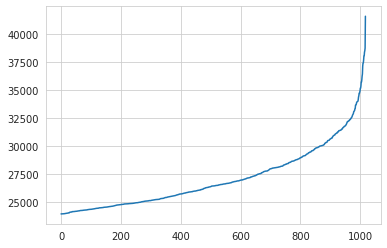

In [6]:
outliers = df[df["Sales"]>23979].sort_values('Sales')
x = np.arange(0,1018)
plt.plot(x, outliers['Sales'][:1018])

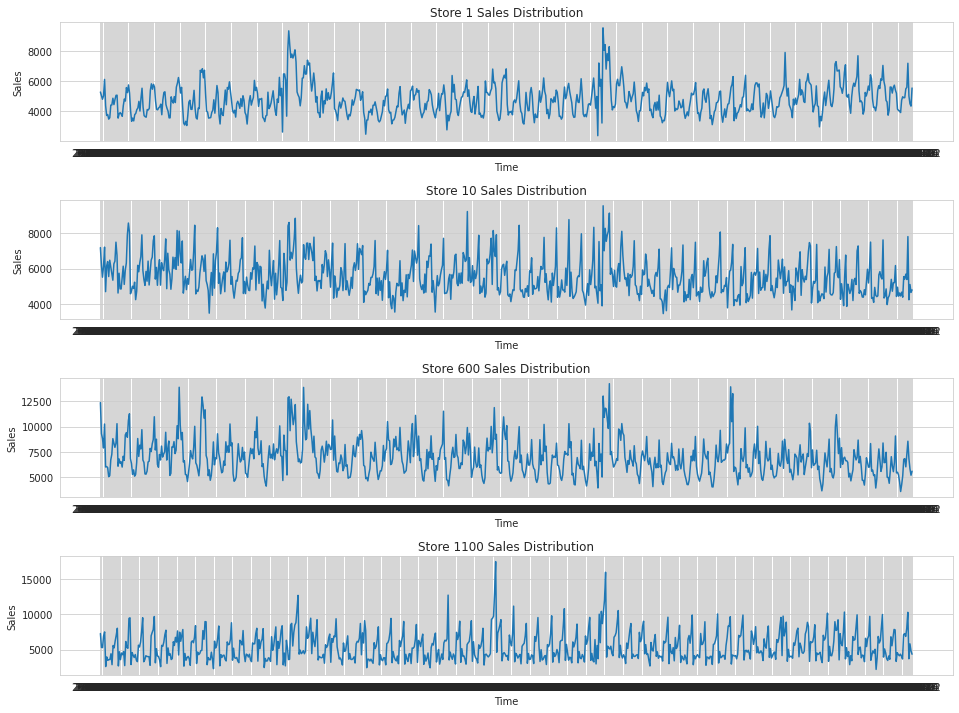

In [7]:
# Plotting sales distribution plot for different stores
import matplotlib.pyplot as plt
store_1 = df.loc[(df["Store"]==1)&(df['Sales']>0) , ['Date',"Sales"]] # Store 1
store_10 = df.loc[(df["Store"]==10)&(df['Sales']>0), ['Date',"Sales"]] # Store 10
store_600 = df.loc[(df["Store"]==600)&(df['Sales']>0) ,['Date',"Sales"]] # Store 600
store_1100 = df.loc[(df["Store"]==1100)&(df['Sales']>0) , ['Date',"Sales"]] # Store 1100
f = plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace = 0.5)
ax1 = f.add_subplot(411)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(412)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

ax2 = f.add_subplot(413)
ax2.plot(store_600['Date'], store_600['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 600 Sales Distribution')

ax2 = f.add_subplot(414)
ax2.plot(store_1100['Date'], store_1100['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 1100 Sales Distribution')

plt.show()

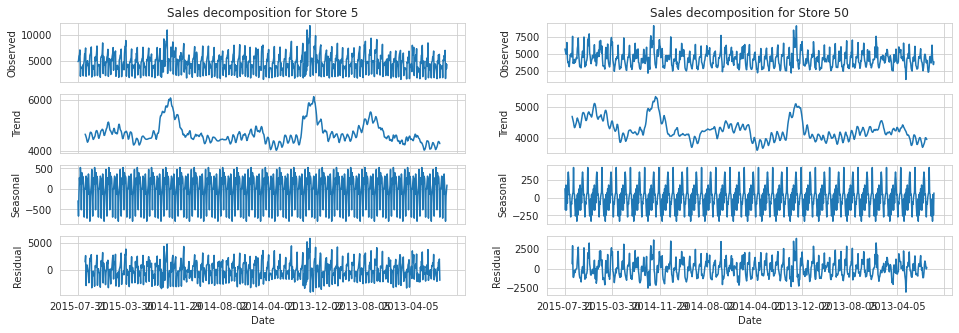

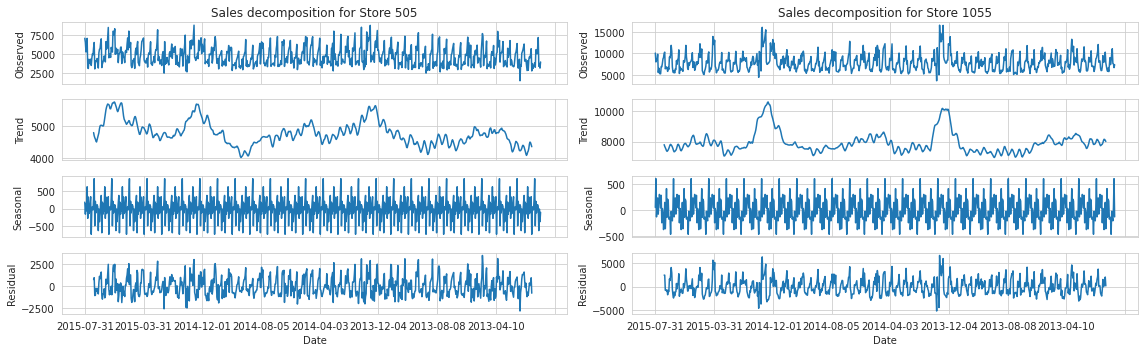

In [8]:
# For different stores
def plotseasonal(res, axes, title):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].set_title(title)


fig, axes1 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,5))
fig, axes2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,5))

store_5 = df.loc[(df["Store"]==5)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date') # Store 5
store_50 = df.loc[(df["Store"]==50)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date') # Store 50
store_505 = df.loc[(df["Store"]==505)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date') # Store 505
store_1055 = df.loc[(df["Store"]==1055)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date') # Store 1055

result5 = seasonal_decompose(store_5, model='additive', freq=30)
result50 = seasonal_decompose(store_50, model='additive', freq=30)
result505 = seasonal_decompose(store_505, model='additive', freq=30)
result1055 = seasonal_decompose(store_1055, model='additive', freq=30)

plotseasonal(result5, axes1[:,0], title = 'Sales decomposition for Store 5')
plotseasonal(result50, axes1[:,1], title = 'Sales decomposition for Store 50')
plotseasonal(result505, axes2[:,0], title = 'Sales decomposition for Store 505')
plotseasonal(result1055, axes2[:,1], title = 'Sales decomposition for Store 1055')

plt.tight_layout()
plt.show()


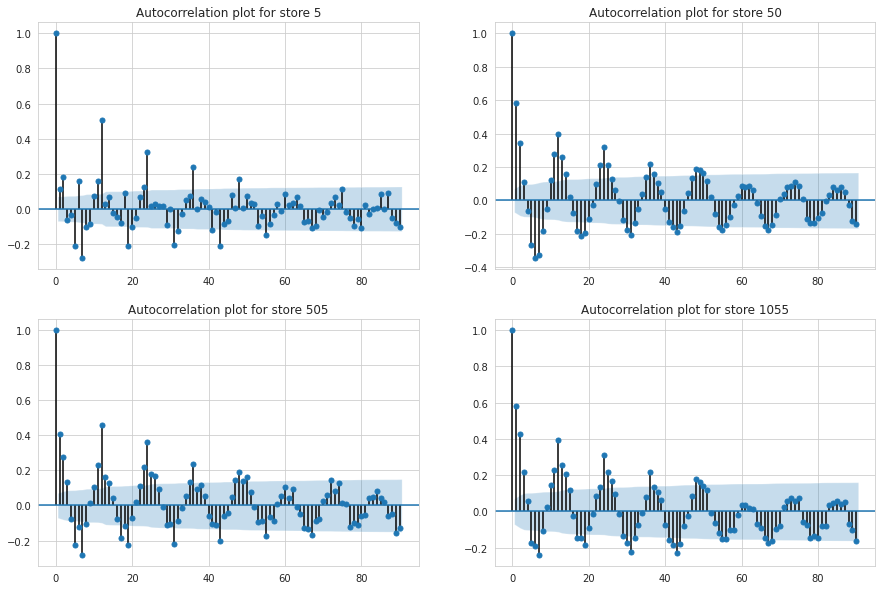

In [9]:
f = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = 0.2)
ax1 = f.add_subplot(221)
plot_acf(store_5, lags = 90, ax= ax1, title = 'Autocorrelation plot for store 5')
ax2 = f.add_subplot(222)
plot_acf(store_50, lags = 90, ax= ax2, title = 'Autocorrelation plot for store 50')
ax3 = f.add_subplot(223)
plot_acf(store_505, lags = 90, ax= ax3, title = 'Autocorrelation plot for store 505')
ax4 = f.add_subplot(224)
plot_acf(store_1055, lags = 90, ax= ax4, title = 'Autocorrelation plot for store 1055')
plt.show()


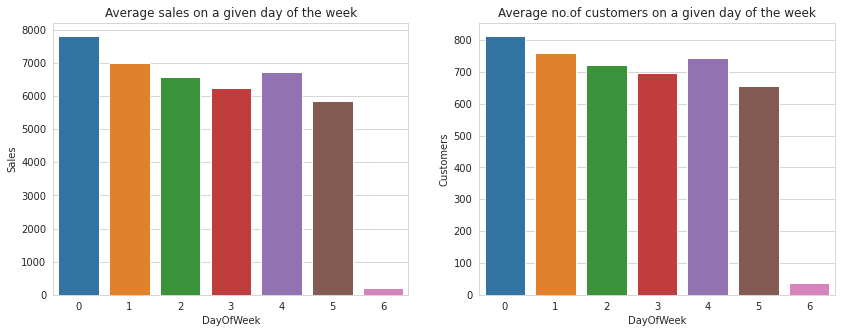

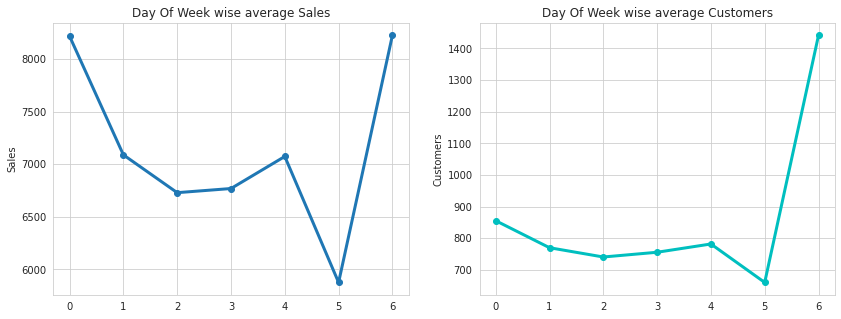

In [10]:

# Day Of Week
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
fig, (ax3,ax4) = plt.subplots(1,2,figsize=(14,5))

dw_df = df.groupby('DayOfWeek')['Sales'].mean()
dw_df_c = df.groupby('DayOfWeek')['Customers'].mean()
sns.barplot(x=dw_df.index, y=dw_df.values, ax=ax1)
ax1.set_title('Average sales on a given day of the week')
ax1.set_ylabel('Sales')
sns.barplot(x=dw_df_c.index, y=dw_df_c.values, ax=ax2)
ax2.set_title('Average no.of customers on a given day of the week')
ax2.set_ylabel('Customers')

dw_m = df[mask].groupby('DayOfWeek')['Sales'].mean()
dw_mc = df[mask].groupby('DayOfWeek')['Customers'].mean()

ax3.plot(dw_m.index.tolist(), dw_m.values, '-', marker = 'o', linewidth = 3)
ax3.set_title('Day Of Week wise average Sales')
ax3.set_ylabel('Sales')

ax4.plot(dw_mc.index.tolist(), dw_mc.values, '-', marker = 'o', linewidth = 3, color = 'c')
ax4.set_title('Day Of Week wise average Customers')
ax4.set_ylabel('Customers')


plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df)

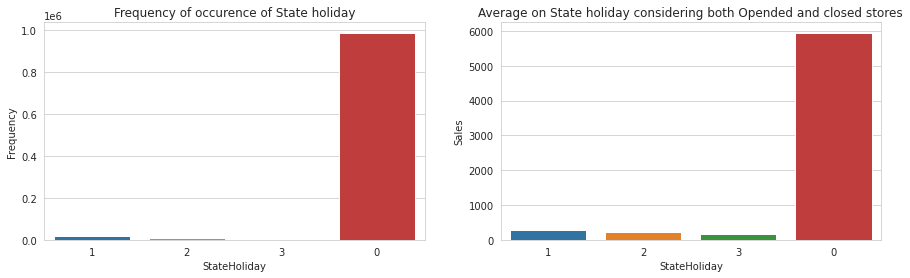

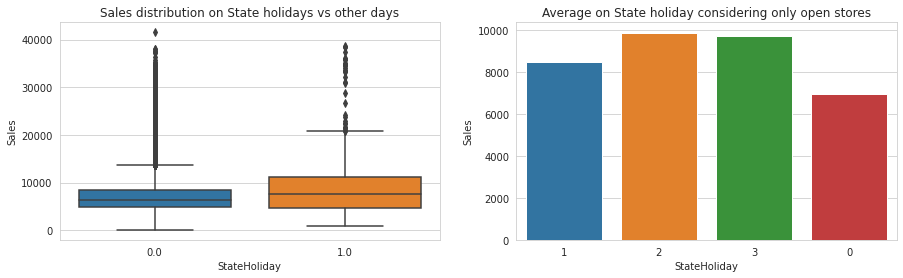

In [12]:

# State Holiday
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,4))
df["StateHoliday"].loc[df["StateHoliday"] == 0] = "0"
sth_df = df.groupby('StateHoliday')['Date'].count()
sns.barplot(sth_df.index, sth_df.values, ax = axis1)
axis1.set_ylabel('Frequency')
axis1.set_title('Frequency of occurence of State holiday')


sth_df_s = df.groupby('StateHoliday')['Sales'].mean()
sns.barplot(x=sth_df_s.index, y=sth_df_s.values, ax=axis2)
axis2.set_title('Average on State holiday considering both Opended and closed stores')
axis2.set_ylabel('Sales')

mask = df["Sales"] > 0
df_copy = df.copy()
df_copy["StateHoliday"] = df[mask]["StateHoliday"].apply(lambda x:0 if x=="0" else 1)
sns.boxplot(x='StateHoliday', y='Sales', data=df_copy, ax=axis3)
axis3.set_title('Sales distribution on State holidays vs other days')

sth_df_s=df[mask].groupby('StateHoliday')['Sales'].mean()
sns.barplot(x=sth_df_s.index, y=sth_df_s.values, ax=axis4)
axis4.set_ylabel('Sales')
axis4.set_title('Average on State holiday considering only open stores')
plt.show()

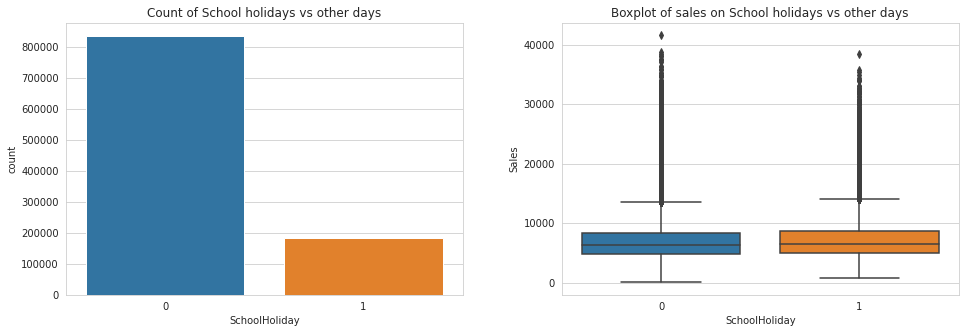

In [13]:
# School Holiday

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))
plt.subplots_adjust(wspace = 0.25)
sns.countplot(x='SchoolHoliday', data=df, ax = axis1)
axis1.set_title('Count of School holidays vs other days')
mask = mask = df["Sales"] > 0
sch_df = df[mask]

sns.boxplot(data = sch_df, x = 'SchoolHoliday', y = 'Sales', ax=axis2)
axis2.set_title('Boxplot of sales on School holidays vs other days')


plt.show()

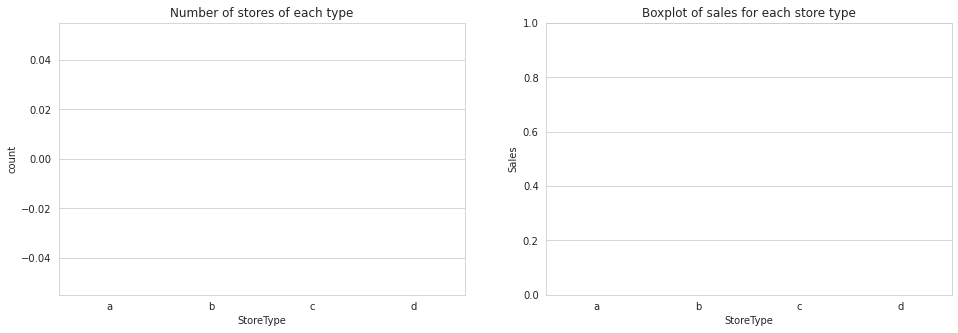

In [14]:

# Store Type 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))
sns.countplot(x='StoreType', data=df, order=['a','b','c', 'd'], ax=axis1)
axis1.set_title('Number of stores of each type')

sns.boxplot(x='StoreType', y='Sales', data=df[mask], order=['a','b','c', 'd'],ax=axis2)
axis2.set_title('Boxplot of sales for each store type')
plt.show()

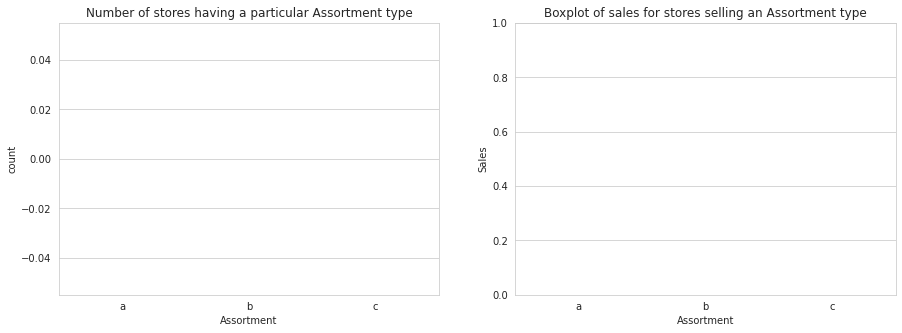

In [15]:
# Assortment  
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Assortment', data=df, order=['a','b','c'], ax=axis1)
axis1.set_title('Number of stores having a particular Assortment type')

sns.boxplot(x='Assortment', y='Sales', data=df[mask], order=['a','b','c'],ax=axis2)
axis2.set_title('Boxplot of sales for stores selling an Assortment type')
plt.show()

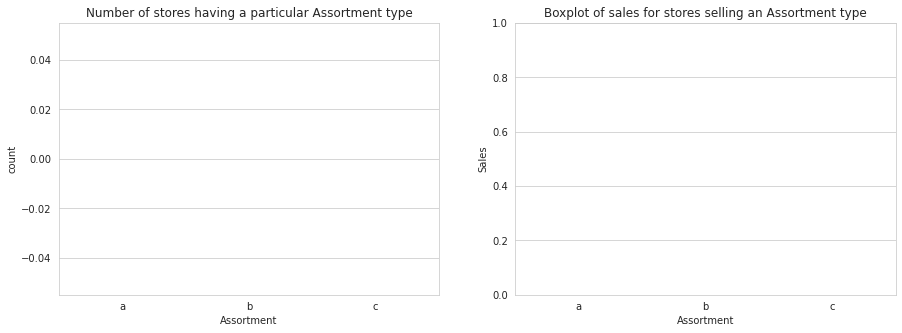

In [16]:

# Assortment  
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Assortment', data=df, order=['a','b','c'], ax=axis1)
axis1.set_title('Number of stores having a particular Assortment type')

sns.boxplot(x='Assortment', y='Sales', data=df[mask], order=['a','b','c'],ax=axis2)
axis2.set_title('Boxplot of sales for stores selling an Assortment type')
plt.show()